In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split as tts

In [3]:
def train_weights_and_missed(features, labels, l_rate, itr):
    w = np.zeros((1,features.shape[1]+1))
    misclassified = []
    for epoch in range(itr):
        missed = 0
        for x, label in zip(features, labels):
            x = np.insert(x, 0, 1)
            y = np.dot(w, x.T)
            target = 1.0 if (y>1) else 0.0
            error = (label - target)
            if(error): #misclassified
                missed += 1
                w += l_rate * error * x
        misclassified.append(missed)
    return (w, misclassified)

In [4]:
def predict(row, weights):
    weights = weights[0].tolist()
    row = row.tolist()
    activation = weights[0] #bias
    for i in range(len(row)-1):
        activation += weights[i + 1] * row[i]
    #print(activation)
    return 1.0 if activation >= 0.84 else 0.0

In [7]:
# Perceptron Algorithm With Stochastic Gradient Descent
def perceptron(train, test, ytrain, l_rate, n_epoch):
    predictions = list()
    weights, misclassified = train_weights_and_missed(train, ytrain, l_rate, n_epoch)
    for row in test:
        prediction = predict(row, weights)
        predictions.append(prediction)
    return(predictions,misclassified)

In [8]:
#loading data
data = pd.read_csv('iris_dataset.csv', header=None)
data = data.T
data.drop(data.columns[0], axis=1, inplace=True)
data = data.T                       
label = np.where(data.iloc[:, -1] == 'Iris-setosa', 0 ,1)
data.drop(data.columns[2], axis=1, inplace=True)
data = np.array(data, dtype = 'float64')
data = MinMaxScaler().fit_transform(data)

In [9]:
X_train, X_test, y_train, y_test = tts(data, label, test_size=0.2, random_state=42)

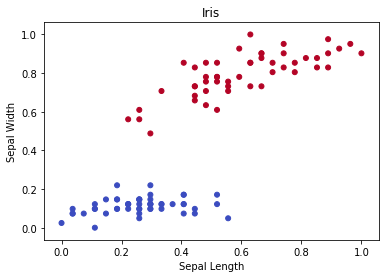

In [10]:
plt.title('Iris')
plt.scatter(data[:, 0], data[:, 1], c=label, cmap=plt.cm.coolwarm, s=25)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [11]:
y_predict, misclassified = perceptron(X_train, X_test, y_train, 0.1, 20)

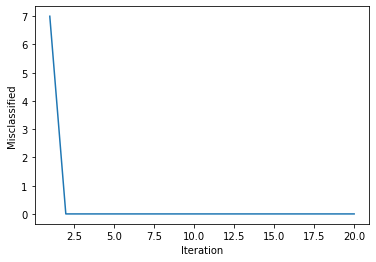

In [12]:
#just to see misclassified per each iteration
epochs = np.arange(1, 21)
plt.plot(epochs, misclassified)
plt.xlabel('Iteration')
plt.ylabel('Misclassified')
plt.show()

Text(91.68, 0.5, 'predicted label')

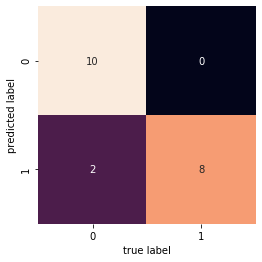

In [13]:
mat = confusion_matrix(y_test, y_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')